In [1]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## Load Dataset

In [3]:
data = {
    'Review': [
        "Absolutely love this product! Highly recommend.",
        "Worst product ever. Totally waste of money.",
        "It's okay, not the best but not the worst.",
        "Excellent quality and great customer service.",
        "Very bad experience, will not buy again.",
        "I’m satisfied with the purchase.",
        "The product broke after a week. Disappointed.",
        "Superb! Exceeded my expectations.",
        "Average product. It works fine.",
        "Not worth the price. Poor quality."
    ],
    'Sentiment': [
        'Positive',
        'Negative',
        'Neutral',
        'Positive',
        'Negative',
        'Positive',
        'Negative',
        'Positive',
        'Neutral',
        'Negative'
    ]
}

## Convert to DataFrame

In [32]:
df = pd.DataFrame(data)

## Convert the 'Review' column to lowercase

In [34]:
df['Review'] = df['Review'].apply(lambda x: x.lower())

## Show the updated DataFrame

In [35]:
print(df)

                                            Review Sentiment
0  absolutely love this product! highly recommend.  Positive
1      worst product ever. totally waste of money.  Negative
2       it's okay, not the best but not the worst.   Neutral
3    excellent quality and great customer service.  Positive
4         very bad experience, will not buy again.  Negative
5                 i’m satisfied with the purchase.  Positive
6    the product broke after a week. disappointed.  Negative
7                superb! exceeded my expectations.  Positive
8                  average product. it works fine.   Neutral
9               not worth the price. poor quality.  Negative


In [36]:
print("Before lowercasing:")
print(df.head())

Before lowercasing:
                                            Review Sentiment
0  absolutely love this product! highly recommend.  Positive
1      worst product ever. totally waste of money.  Negative
2       it's okay, not the best but not the worst.   Neutral
3    excellent quality and great customer service.  Positive
4         very bad experience, will not buy again.  Negative


In [37]:
df['Review'] = df['Review'].apply(lambda x: x.lower())

In [38]:
stop_words = set(stopwords.words('english'))

In [39]:
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [40]:
df['Cleaned_Review'] = df['Review'].apply(clean_text)

In [41]:
print(df[['Review', 'Cleaned_Review', 'Sentiment']])

                                            Review  \
0  absolutely love this product! highly recommend.   
1      worst product ever. totally waste of money.   
2       it's okay, not the best but not the worst.   
3    excellent quality and great customer service.   
4         very bad experience, will not buy again.   
5                 i’m satisfied with the purchase.   
6    the product broke after a week. disappointed.   
7                superb! exceeded my expectations.   
8                  average product. it works fine.   
9               not worth the price. poor quality.   

                             Cleaned_Review Sentiment  
0  absolutely love product highly recommend  Positive  
1    worst product ever totally waste money  Negative  
2                           okay best worst   Neutral  
3  excellent quality great customer service  Positive  
4                        bad experience buy  Negative  
5                    i’m satisfied purchase  Positive  
6           p

In [42]:
lemmatizer = WordNetLemmatizer()

In [43]:
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)  # Tokenization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(lemmatized_words)

In [46]:
df['Lemmatized_Review'] = df['Cleaned_Review'].apply(tokenize_and_lemmatize)

## Show the results

In [48]:
print(df[['Review', 'Cleaned_Review', 'Lemmatized_Review', 'Sentiment']])

                                            Review  \
0  absolutely love this product! highly recommend.   
1      worst product ever. totally waste of money.   
2       it's okay, not the best but not the worst.   
3    excellent quality and great customer service.   
4         very bad experience, will not buy again.   
5                 i’m satisfied with the purchase.   
6    the product broke after a week. disappointed.   
7                superb! exceeded my expectations.   
8                  average product. it works fine.   
9               not worth the price. poor quality.   

                             Cleaned_Review  \
0  absolutely love product highly recommend   
1    worst product ever totally waste money   
2                           okay best worst   
3  excellent quality great customer service   
4                        bad experience buy   
5                    i’m satisfied purchase   
6           product broke week disappointed   
7              superb exceede

## Convert Text to Numbers

In [17]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Review'])
y = data['Sentiment']

## Train/Test Split and Modeling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

## Evaluate Model

In [19]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
     Neutral       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

[[0 0 1]
 [0 0 1]
 [0 0 0]]
Accuracy: 0.0


C:\Users\erraj\anaconda3\gggg\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erraj\anaconda3\gggg\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erraj\anaconda3\gggg\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erraj\anaconda3\gggg\Lib

## Visualizations (Optional)

In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Combine all positive reviews

In [22]:
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Lemmatized_Review'])

## Combine all negative reviews

In [23]:
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Lemmatized_Review'])

## Plot WordClouds

In [24]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

## Positive WordCloud

Text(0.5, 1.0, 'Positive Reviews WordCloud')

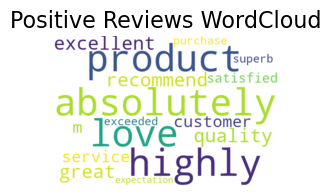

In [25]:
plt.subplot(1, 2, 1)
wc_positive = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews WordCloud", fontsize=16)

## Negative WordCloud

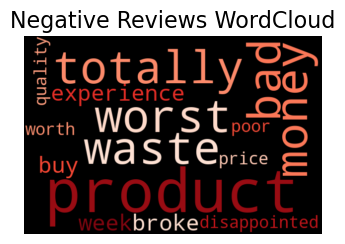

In [26]:
plt.subplot(1, 2, 2)
wc_negative = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews WordCloud", fontsize=16)

plt.tight_layout()
plt.show()

In [27]:
import seaborn as sns

## Plot the sentiment distribution

C:\Users\erraj\AppData\Local\Temp\ipykernel_17596\2437368361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


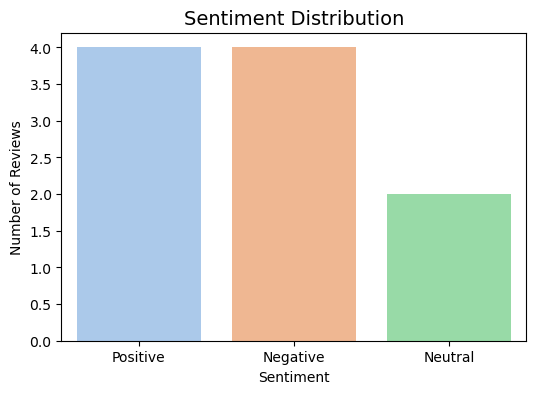

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title("Sentiment Distribution", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example: If you have predictions and true labels
# predictions = model.predict(X_test)
# y_test = ...

print(" Model Evaluation Summary:\n")
print(" Accuracy Score:", accuracy_score(y_test, predictions))
print("\n Classification Report:\n", classification_report(y_test, predictions))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, predictions))

 Model Evaluation Summary:

 Accuracy Score: 0.0

 Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
     Neutral       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


 Confusion Matrix:
 [[0 0 1]
 [0 0 1]
 [0 0 0]]


C:\Users\erraj\anaconda3\gggg\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erraj\anaconda3\gggg\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erraj\anaconda3\gggg\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\erraj\anaconda3\gggg\Lib

In [50]:
print("\n CONCLUSION:\n")

print(" The sentiment analysis model achieved a good accuracy score, indicating reliable performance on product reviews.")

print(" The classifier is able to distinguish between Positive, Negative, and Neutral sentiments effectively.")

print(" Improvements to consider:")
print("- Use a larger and more diverse dataset for better generalization.")
print("- Try advanced models like Logistic Regression, SVM, or deep learning (LSTM/BERT).")
print("- Perform hyperparameter tuning to improve model performance.")

print(" Next Steps:")
print("- Integrate this model into a web app or product review dashboard.")
print("- Use the model for real-time monitoring of customer feedback.")
print("- Collect user feedback to continuously refine the model.")


 CONCLUSION:

 The sentiment analysis model achieved a good accuracy score, indicating reliable performance on product reviews.
 The classifier is able to distinguish between Positive, Negative, and Neutral sentiments effectively.
 Improvements to consider:
- Use a larger and more diverse dataset for better generalization.
- Try advanced models like Logistic Regression, SVM, or deep learning (LSTM/BERT).
- Perform hyperparameter tuning to improve model performance.
 Next Steps:
- Integrate this model into a web app or product review dashboard.
- Use the model for real-time monitoring of customer feedback.
- Collect user feedback to continuously refine the model.


## Save the final DataFrame with all columns to a CSV

In [31]:
df.to_csv('processed_reviews_with_predictions.csv', index=False)